In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def list_states(nq):
    """Lists the possible states in binary format of a
    register with nq qubits.
    
    Output
    states: list of strings in binary format containing the list
        of all possible states.
    
    Parameters
    nq: integer of the number of qubits.
    
    """
    states = []
    for k in range(2 ** nq):
        kbin = bin(k)[2:]
        while len(kbin) < nq:
            kbin = '0' + kbin
        states.append(kbin)
        
    return states

def pauli_base(nq):
    """Generates all the elements of an algebra given by
    (1/2)^{n/2}sigma_{i_1} otimes sigma_{i_2} otimes
    ... sigma_{i_n} using Eq. (B1) iteratively where
    sigma_0 is the 2 x 2 identity matrix and sigma_1,
    sigma_2 and sigma_3 are the Pauli matrices
    
    Output
    base_1: numpy array containing all the elements of
        the matrix base.
    
    Parameters
    nq: integer with the number of qubits.
    
    """
    base_0 = np.array([
        (1.0/np.sqrt(2.0) + 0j) * np.identity(2),
        (1.0/np.sqrt(2.0) + 0j) * np.array([[0, 1], [1, 0]]),
        (1.0/np.sqrt(2.0) + 0j) * np.array([[0, -1j], [1j, 0]]),
        (1.0/np.sqrt(2.0) + 0j) * np.array([[1, 0], [0, -1]])
    ])
    
    base_1 = base_0[:]
    
    for k in range(nq - 1):
        base_2 = []
        for el1 in base_1:
            for el0 in base_0:
                base_2.append(np.kron(el1, el0))
        base_1 = np.array(base_2)
    
    return base_1

In [32]:
# qubit number
nq = 3
base = pauli_base(1)

In [33]:
# Initial value of the density
# matrix
dim = 4
rho0 = [0.5, 0.0, 0.0, -0.5]


In [34]:
# Read results DataFrames and unpack them
if True:
    df_od = pd.read_csv('Results/example-1/results_od.csv')
    shp = df_od.shape
    t_list_od = df_od['0'].tolist()
    rho_list_od = df_od[[str(ii) for ii in range(1, shp[1] - 1)]].to_numpy()
    
if True:
    df_qg = pd.read_csv('Results/example-1/results_qg.csv')
    shp = df_qg.shape
    t_list_qg = df_qg['0'].tolist()
    rho_list_qg = df_qg[[str(ii) for ii in range(1, shp[1] - 1)]].to_numpy()

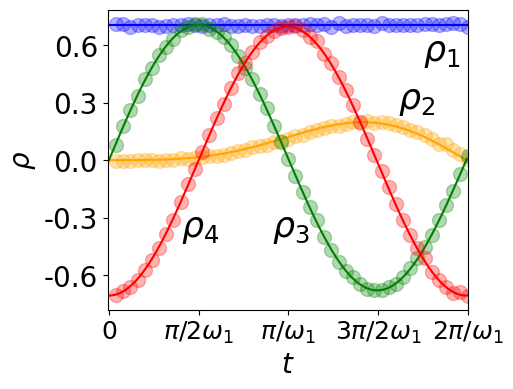

In [35]:
# Plot the density matrix coefficients
# from the classical and quantum
# simulations.
# The continuous lines are the classical
# simulation and the dots correspond
# to the quantum simulation.

# Plot quantum algorithm results if plot_qg=True
# otherwise do not plot them
plot_qg = True

colors = ['blue', 'orange', 'green', 'red']
y_lims = [-0.6, -0.3, 0.0, 0.3, 0.6]

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)

system_states = list_states(nq - 1)

for state in system_states:
    k = int(state, 2)
    if plot_qg :
        ax.plot(t_list_qg, rho_list_qg[:, k], 
               '.', alpha = 0.3, markersize = 20, color = colors[k])
    ax.plot(t_list_od, rho_list_od[:, k],
            '-' , color = colors[k])


ax.set_xlim([-0.001, 2 * np.pi/22.0])
ax.set_xlabel('$t$', fontsize=20)
ax.set_ylabel('$\\rho $', fontsize=20)
ax.set_xticks([2 * np.pi / 22.0 * ii/4 for ii in range(0, 5)])
ax.set_xticklabels(['$0$', '$\\pi/2\omega_1$', '$\\pi/\omega_1$', '$3\\pi/2\omega_1$', '$2\\pi/\omega_1$'],
                   fontsize = 18)
ax.set_yticks(y_lims)
ax.set_yticklabels(y_lims, fontsize=20)

plt.text(0.250,  0.520, '$\\rho_1$', fontsize=25)
plt.text(0.230,  0.270, '$\\rho_2$', fontsize=25)       
plt.text(0.130, -0.400, '$\\rho_3$', fontsize=25)
plt.text(0.057, -0.400, '$\\rho_4$', fontsize=25)

plt.subplots_adjust(left=0.2, right=0.92, bottom=0.2, top=0.95)
plt.savefig('fig.pdf')

plt.show()


In [36]:
# Operators
# Population of the lowest energy level
pl = np.array([[0,0], [0,1]])
# Population of the highest energy level
ph = np.array([[1,0], [0,0]])

# Spin projection along z
Sz = np.array([[1/2 ,0], [0, -1/2]])


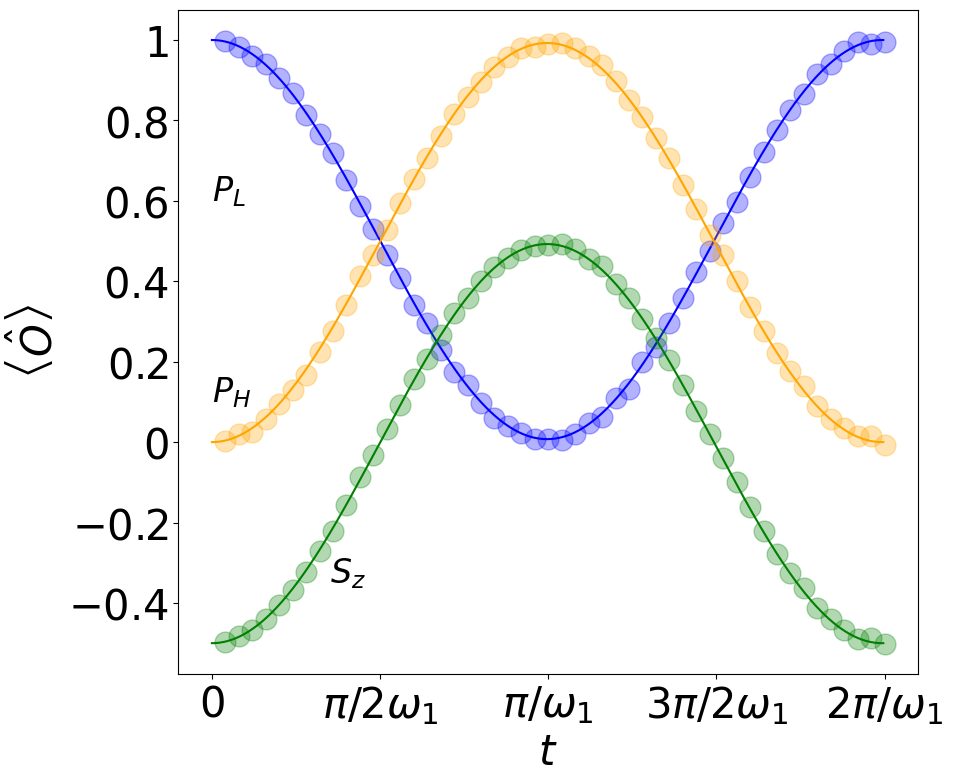

In [38]:
# Plot expected values for the first particle

ops = [pl, ph, Sz]

colors = ['blue', 'orange', 'green', 'red']
y_lims = [-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


for jj, op in enumerate(ops):
    am_op_qg = 0.0j * np.zeros((np.shape(rho_list_qg)[0]))
    am_op_od = 0.0j * np.zeros((np.shape(rho_list_od)[0]))

    for kk in range(dim):
        proj = np.trace(np.matmul(base[kk], op))
        am_op_qg[:] += rho_list_qg[:, kk] * proj
        am_op_od[:] += rho_list_od[:, kk] * proj

    av_op_qg = np.real(am_op_qg[:])
    av_op_od = np.real(am_op_od[:])

    ax.plot(t_list_qg, av_op_qg, 
            '.', alpha = 0.3, markersize = 30, color = colors[jj])
    ax.plot(t_list_od, av_op_od,
            '-' , color = colors[jj])
    ax.set_xticks([2 * np.pi / 22.0 * ii/4 for ii in range(0, 5)])
    ax.set_xticklabels(['$0$', '$\\pi/2\omega_1$', '$\\pi/\omega_1$', '$3\\pi/2\omega_1$', '$2\\pi/\omega_1$'],
                       fontsize=30)
    ax.set_yticks(y_lims)
    ax.set_yticklabels(['$' + str(y) + '$' for y in y_lims], fontsize=30)

ax.text(0.000,  0.600, '$P_{L}$', size=24)
ax.text(0.000,  0.100, '$P_{H}$', size=24)
ax.text(0.050, -0.350, '$S_{z}$', size=24)


ax.set_xlabel('$t$', fontsize=30)
ax.set_ylabel('$\\left\\langle \\hat{O}\\right\\rangle$', fontsize=30)

plt.subplots_adjust(left=0.18, right=0.92, bottom=0.12, top=0.95)
plt.savefig('fig.pdf')

plt.show()